# Threshold

由于图像阈值处理直接,实现简单而且计算速度快。因此在图像分割中处于核心地位。
阈值处理可视为一种统计决策理论问题，其目的是在把像素分配给两组或多组的过程中，使引入的平均误差最小。对于这个问题，已知一个解析解，称为贝叶斯决策函数。然而实现求解的过程也很复杂。对与实时应用来说并非总是合适。

## Otsu方法

Otsu是一种具有吸引力的替代方案。这种方法在最大化类间方差方面是最优的，因此是在统计判别分析中使用的一种著名的测度。这种方法的基本思想是，经过正确阈值处理后的类别相对于他们的像素的灰度值而言是不同的，更具灰度值给出类间最有分离的一个阈值会是最好的阈值。

设 一幅大小为M * N像素的数字图像中的L{0,1,2....,L-1}个不同的整数灰度级，并令$n_i$表示灰度级i的像素数。图像中的像素总数 $ MN = n_0 + n_1 +n_2 +....+n_L-1 $ 。由此有：
$$
    \sum_{i=0}^{L-1}p_i = 1 ,p_i >= 0
$$

整个图像的平均灰度为：
$$
    m_G = \sum_{i=0}^{L-1}ip_i
$$

整个图像方差为:
$$
    \sigma^2 = \sum_{i=0}^{L-1}(i-m_G)^2P_i
$$

假设灰度级**k**是目标所求的最大类间方差。将图像分类$c_1$,$c_2$
像素被分配给$c_1$的概率：
$$
    P_1(k) = \sum_{i=0}^kP_i
$$

$c_2$的概率：
$$
    P_2(k) = \sum_k^{L-1}p_i = 1-P_1(k)
$$

类间方差的定义
$$
    \sigma^2 = P_1(m_1 - m_G)^2 + P_2(m_2 - m_G)^2
$$

这个表达式也可以写为

$$
    \sigma^2 = P_1P_2(m_1-m_2)^2 = \frac{(m_G P_1 - m)^2}{P_1(1-P_1)}
$$

将k带入表达式
$$
    \sigma^2 = \frac{[m_Gp_1(k) - m(k)]^2}{P_1{k}[1-P_1(k)]}
$$

从而获得最有值 
$$
    \sigma^2(k_*) = max_{0<=k<=L-1} \sigma^2(k)
$$

我们只需要遍历{0,1,2...L-1}个灰度值，取出其中最大值。**就是我们所要寻找的阈值**。

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

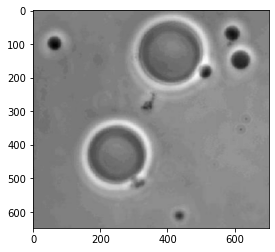

In [2]:
f = plt.imread("./../images/polymercell.tif")
plt.imshow(f , "gray")

In [3]:
gray_level = np.zeros(255)

<BarContainer object of 255 artists>

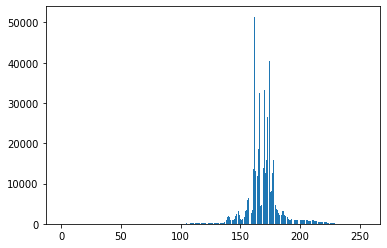

In [4]:
# 柱状图显示出图片的灰度情况
h,w = f.shape 
for y in range(h):
    for x in range(w):
        gray = f[y][x]
        gray_level[gray] += 1
plt.bar(range(len(gray_level)) , gray_level)

In [5]:
# 开始我们的Otsu算法吧!

#1. 求出Pi
Pi = gray_level / (h * w)
Pi

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [6]:
# 2.计算累积和
Pik = np.zeros((255))
for k in range(255):
    if k == 0 : 
        Pik[0] = Pi[0]
        continue
    Pik[k] =  Pik[k-1] + Pi[k]
Pik


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [7]:
# 3.计算累积均值
M = np.zeros(255)
for k in range(255):
    if k == 0 :
        M[k] =  0 
        continue 
    temp = 0
    for ki in range(k + 1):
        temp += ki * Pi[ki]
    M[k] = 1 / Pik[k] * temp    
M

<ipython-input-7-f5e80019ba27>:10: RuntimeWarning: divide by zero encountered in double_scalars
  M[k] = 1 / Pik[k] * temp
<ipython-input-7-f5e80019ba27>:10: RuntimeWarning: invalid value encountered in double_scalars
  M[k] = 1 / Pik[k] * temp


array([  0.        ,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [8]:
# 4. 求出全局平均值
mg = f.mean()
mg

169.6083434455348

In [9]:
# 5.计算类间方差
Sigma = np.zeros(255)
for k in range(255):
    Sigma[k] = ((mg * Pik[k] - M[k]) ** 2) / (Pik[k] * ( 1 - Pik[k]))
Sigma

<ipython-input-9-9b6bba0eeabe>:4: RuntimeWarning: invalid value encountered in double_scalars
  Sigma[k] = ((mg * Pik[k] - M[k]) ** 2) / (Pik[k] * ( 1 - Pik[k]))


array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

In [10]:
Sigma[np.isnan(Sigma) | np.isinf(Sigma)] = 0

In [13]:
k_star = np.argmax(Sigma)
k_star
thresold = mg
thresold

169.6083434455348

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ...,   0.,   0., 255.]])

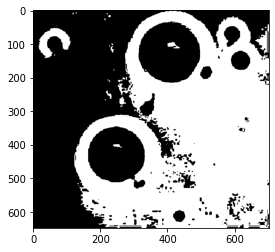

In [14]:
res = np.zeros((h,w))
for y in range(h):
    for x in range(w):
        v = f[y][x]
        if v < thresold :
            res[y][x] = 0 
        else :
            res[y][x] = 255
plt.imshow(res , "gray")
res